In [216]:
# TensorFlow and Keras for deep learning
from tensorflow import keras
from tensorflow.keras import layers

# For handling the dataset
import numpy as np
import matplotlib.pyplot as plt
#
from keras.models import Sequential
from keras.layers import Dense, Activation

#Classification report
from sklearn.metrics import classification_report, confusion_matrix

import pandas as pd
import os


import re, string, tensorflow as tf
from tensorflow.keras import layers

# Image Classification Model

In [217]:
from tensorflow.keras.datasets import cifar10

In [218]:
#load data
(train_images, train_labels),(test_images, test_labels) = keras.datasets.cifar10.load_data()

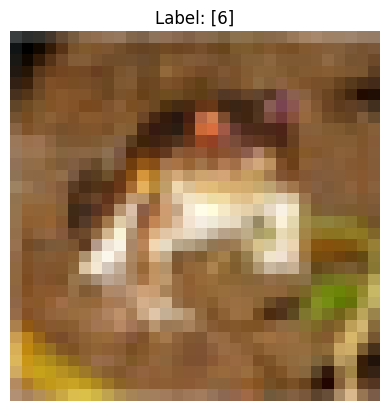

In [219]:
#explore data
# Visualize one image
plt.imshow(train_images[0], cmap="gray")
plt.title(f"Label: {train_labels[0]}")
plt.axis("off")
plt.show()

In [220]:
#preprocessing data
import numpy as np
from typing import Tuple

def preprocess_images(
        images: np.ndarray,
        labels: np.ndarray | None = None,
        flatten: bool = True,
        one_hot: bool = False,
        num_classes: int | None = None
) -> Tuple[np.ndarray, np.ndarray | None]:

    # 1. Normalización
    images = images / 255.0

    # 2. Opcionalmente aplanar
    ''' images.shape[0] → número de muestras N'''
    '''-1 indica a NumPy que “calcule automáticamente” el tamaño de 
    la dimensión que falta usando el producto de las dimensiones restantes.'''
    if flatten:
        images = images.reshape(images.shape[0], -1)
        

    # 3. Procesar labels si vienen
    if labels is not None:
        if one_hot:
            if num_classes is None:
                num_classes = int(np.max(labels)) + 1
            labels = np.eye(num_classes, dtype='float32')[labels]
        return images, labels
    else:
        return images, None


In [221]:
# Para una red densa (aplanamos):
#“Aplanar” (o flatten) una imagen significa convertir su arreglo multidimensional — 
# que conserva la estructura espacial de alto × ancho × canales — en un vector de una sola dimensión.
train_images_pr, train_labels_pr = preprocess_images(train_images, train_labels, flatten=True, one_hot=False, num_classes=10)
test_images_pr,  test_labels_pr  = preprocess_images(test_images,  test_labels,  flatten=True, one_hot=False, num_classes=10)

In [222]:
# BUILD THE MODEL
'''la última layer debe ser de 10 porque son 10 clases de respuesta
el activation que se debe usar para reconocer imágenes es softmax'''
model_image = Sequential([
    layers.Dense(128, activation='softmax', input_shape=(3072,)),
    layers.Dense(10, activation='softmax')
])

c:\Users\Maria Paula\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [223]:
#COMPILE THE MODEL
model_image.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [224]:
#TRAIN THE MODEL
model_image.fit(train_images_pr, train_labels_pr,
        epochs=5,
        batch_size=32,
        validation_split=0.1)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1635 - loss: 2.2051 - val_accuracy: 0.1814 - val_loss: 2.1081
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1771 - loss: 2.1046 - val_accuracy: 0.1828 - val_loss: 2.1159
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1792 - loss: 2.0877 - val_accuracy: 0.1932 - val_loss: 2.0773
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1861 - loss: 2.0790 - val_accuracy: 0.2066 - val_loss: 2.0816
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2031 - loss: 2.0568 - val_accuracy: 0.2136 - val_loss: 2.0426


In [225]:
#EVALUATE
loss, acc = model_image.evaluate(test_images_pr, test_labels_pr)
print("Accuracy Image Recognition:", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2227 - loss: 2.0334
Accuracy Image Recognition: 0.21279999613761902


In [226]:
#PREDICTION
def image_prediction(image):
    # --- predice ---
    probs = model_image.predict(image)
    pred_class = np.argmax(probs, axis=1)[0] 

    return pred_class

In [227]:
#ejemplo de prediccion
sample = np.expand_dims(test_images_pr[5], axis=0) #se debe usar una imagen con el mismo preprocesamiento
sample_image_pred =  image_prediction(sample)
print("Predicción de la imagen:", sample_image_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicción de la imagen: 6


In [228]:
#predicciones con test
image_predictions_test = model_image.predict(test_images_pr)
image_predicted_labels = np.argmax(image_predictions_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [229]:
model_image.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_114 (Dense)               │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,183,904 (4.52 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 789,270 (3.01 MB)

In [230]:
model_image.save('model_image.keras')

In [231]:
#Classification Report
print(classification_report(test_labels, image_predicted_labels))

              precision    recall  f1-score   support

           0       0.17      0.04      0.07      1000
           1       0.34      0.39      0.36      1000
           2       0.11      0.02      0.04      1000
           3       0.16      0.04      0.06      1000
           4       0.11      0.02      0.03      1000
           5       0.00      0.00      0.00      1000
           6       0.17      0.84      0.29      1000
           7       0.00      0.00      0.00      1000
           8       0.24      0.77      0.37      1000
           9       0.17      0.00      0.00      1000

    accuracy                           0.21     10000
   macro avg       0.15      0.21      0.12     10000
weighted avg       0.15      0.21      0.12     10000



c:\Users\Maria Paula\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Maria Paula\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Maria Paula\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

# TEXT CLASSIFICATION MODEL

In [232]:
#IMPORT THE DATA
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 80.2M    0 32768    0     0  61149      0  0:22:55 --:--:--  0:22:55 61248
  0 80.2M    0  512k    0     0   332k      0  0:04:07  0:00:01  0:04:06  332k
  1 80.2M    1 1360k    0     0   532k      0  0:02:34  0:00:02  0:02:32  532k
  3 80.2M    3 3008k    0     0   850k      0  0:01:36  0:00:03  0:01:33  850k
  6 80.2M    6 5104k    0     0  1119k      0  0:01:13  0:00:04  0:01:09 1119k
  8 80.2M    8 7264k    0     0  1307k      0  0:01:02  0:00:05  0:00:57 1440k
 11 80.2M   11 9056k    0     0  1383k      0  0:00:59  0:00:06  0:00:53 1707k
 12 80.2M   12 10.2M    0     0  1391k      0  0:00:59  0:00:07  0:00:52 1830k
 14 80.2M   14 11.5M    0     0  1381k      0  0:00:59  0:00:08  0:00:51 1755k
 16 80.2M   16 13.0M    0     0  1398k      0  0:00

In [233]:
#DataFrames
dataset_dir = "aclImdb"            
train_dir_text   = os.path.join(dataset_dir, "train")
test_dir_text    = os.path.join(dataset_dir, "test")

In [234]:
# 2) Create the raw tf.data.Datasets
batch_size = 32
raw_train_ds = keras.utils.text_dataset_from_directory(
    train_dir_text,
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    seed=1337,
)
raw_val_ds = keras.utils.text_dataset_from_directory(
    train_dir_text,
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=1337,
)
raw_test_ds = keras.utils.text_dataset_from_directory(
    test_dir_text,
    batch_size=batch_size,
)


Found 75000 files belonging to 3 classes.
Using 60000 files for training.
Found 75000 files belonging to 3 classes.
Using 15000 files for validation.
Found 25000 files belonging to 2 classes.


In [239]:
train_sentences = []
for batch_x, _ in raw_train_ds:           # batch_x es un tensor (B,)
    for t in batch_x.numpy():             # pasa a bytes
        train_sentences.append(t.decode("utf-8"))


### Script completo (opción 1)

from tensorflow.keras.preprocessing.text import Tokenizer
import joblib
from pathlib import Path

# 1️⃣  Sacar frases individuales
train_sentences_ds = raw_train_ds.unbatch().map(lambda x, y: x)
train_sentences = [t.decode("utf-8")                 # <-- a string
                   for t in train_sentences_ds.as_numpy_iterator()]

# 2️⃣  Ajustar tokenizer
tokenizer = Tokenizer(num_words=15_000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_sentences)

# 3️⃣  Guardar
joblib.dump(tokenizer, "text_tokenizer.pkl")
print("Tokenizer guardado ✔️")



Tokenizer guardado ✔️


In [ ]:
MAX_TOKENS = 15_000
SEQ_LEN    = 400

# --- a) capa de estandarización -------------------------------
def custom_standardize(x):
    x = tf.strings.lower(x)
    x = tf.strings.regex_replace(x, "<br />", " ")
    x = tf.strings.regex_replace(x, r"[^\w\s]", "")   # quita puntuación
    return x

# --- b) capa de vectorización ---------------------------------
vectorize_layer = layers.TextVectorization(
    standardize=custom_standardize,
    max_tokens=MAX_TOKENS,
    output_mode="int",
    output_sequence_length=SEQ_LEN
)

# --- c) adaptar solo con texto de entrenamiento ----------------
vectorize_layer.adapt(
    raw_train_ds.map(lambda txt, lbl: txt)            # <-- SOLO strings
)

# --- d) función para aplicar la capa ---------------------------
def vectorize_batch(text, label):
    text = tf.expand_dims(text, -1)                   # añade eje "canal"
    return vectorize_layer(text), label


In [ ]:
# --- e) datasets finales --------------------------------------
train_ds = (raw_train_ds
            .map(vectorize_batch)
            .cache()
            .prefetch(10))

val_ds   = (raw_val_ds
            .map(vectorize_batch)
            .cache()
            .prefetch(10))

test_ds  = (raw_test_ds
            .map(vectorize_batch)
            .cache()
            .prefetch(10))

In [ ]:
# 1. Extraer sólo las etiquetas, lote a lote
test_labes_text = test_ds.map(lambda txt, lbl: lbl).as_numpy_iterator()

# 2. Concatenar todos los lotes en un vector 1-D
text_labels_true = np.concatenate([batch for batch in test_labes_text], axis=0)

In [ ]:
import re, string, tensorflow as tf
from tensorflow.keras import layers
from typing import Tuple

def preprocess_text(
        train_raw: tf.data.Dataset | None = None,    # puede venir None al re-usar
        val_raw:   tf.data.Dataset | None = None,
        test_raw:  tf.data.Dataset | None = None,
        *,
        vectorizer: layers.TextVectorization | None = None,  # <-- NUEVO
        max_tokens: int = 15_000,
        seq_len:    int = 400,
        cache:      bool = True,
        prefetch:   int  = 10
) -> Tuple[tf.data.Dataset | None,
           tf.data.Dataset | None,
           tf.data.Dataset | None,
           layers.TextVectorization]:
    """
    Devuelve datasets vectorizados y UNA sola capa TextVectorization.

    Si 'vectorizer' es None se crea y se adapta con 'train_raw'.
    Si se pasa una capa ya adaptada, se reutiliza sin repetir el .adapt().
    """

    # --- 1. Función de estandarización -----------------------------
    def _standardize(x: tf.Tensor) -> tf.Tensor:
        x = tf.strings.lower(x)
        x = tf.strings.regex_replace(x, "<br />", " ")
        x = tf.strings.regex_replace(x,
                                     f"[{re.escape(string.punctuation)}]", "")
        return x

    # --- 2. Crear / reutilizar la capa -----------------------------
    if vectorizer is None:
        vectorizer = layers.TextVectorization(
            standardize=_standardize,
            max_tokens=max_tokens,
            output_mode="int",
            output_sequence_length=seq_len,
        )
        if train_raw is None:
            raise ValueError("Necesito 'train_raw' para adaptar el vocabulario")
        # A


In [ ]:
train_ds_text, val_ds_text, test_ds_text, vect = preprocess_text(
    raw_train_ds, raw_val_ds, raw_test_ds,
    max_tokens=15_000,
    seq_len=400
)

In [ ]:
# MODEL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import re, string, tensorflow as tf
from tensorflow.keras import layers
from typing import Tuple

def preprocess_text(
        train_raw: tf.data.Dataset | None = None,    # puede venir None al re-usar
        val_raw:   tf.data.Dataset | None = None,
        test_raw:  tf.data.Dataset | None = None,
        *,
        vectorizer: layers.TextVectorization | None = None,  # <-- NUEVO
        max_tokens: int = 15_000,
        seq_len:    int = 400,
        cache:      bool = True,
        prefetch:   int  = 10
) -> Tuple[tf.data.Dataset | None,
           tf.data.Dataset | None,
           tf.data.Dataset | None,
           layers.TextVectorization]:
    """
    Devuelve datasets vectorizados y UNA sola capa TextVectorization.

    Si 'vectorizer' es None se crea y se adapta con 'train_raw'.
    Si se pasa una capa ya adaptada, se reutiliza sin repetir el .adapt().
    """

    # --- 1. Función de estandarización -----------------------------
    def _standardize(x: tf.Tensor) -> tf.Tensor:
        x = tf.strings.lower(x)
        x = tf.strings.regex_replace(x, "<br />", " ")
        x = tf.strings.regex_replace(x,
                                     f"[{re.escape(string.punctuation)}]", "")
        return x

    # --- 2. Crear / reutilizar la capa -----------------------------
    if vectorizer is None:
        vectorizer = layers.TextVectorization(
            standardize=_standardize,
            max_tokens=max_tokens,
            output_mode="int",
            output_sequence_length=seq_len,
        )
        if train_raw is None:
            raise ValueError("Necesito 'train_raw' para adaptar el vocabulario")
        # Adaptar SOLO una vez
        vectorizer.adapt(train_raw.map(lambda txt, lbl: txt))

    # --- 3. Función para aplicar la capa ---------------------------
    def _vectorize(text: tf.Tensor, label: tf.Tensor):
        text = tf.expand_dims(text, -1)
        return vectorizer(text), label

    def _prep(ds: tf.data.Dataset | None):
        if ds is None:
            return None
        ds = ds.map(_vectorize)
        if cache:
            ds = ds.cache()
        return ds.prefetch(prefetch)

    # --- 4. Procesar splits ---------------------------------------
    train_ds = _prep(train_raw)
    val_ds   = _prep(val_raw)
    test_ds  = _prep(test_raw)

    return train_ds, val_ds, test_ds, vectorizer



In [ ]:
train_ds, val_ds, test_ds, vec_layer = preprocess_text(
    train_raw=raw_train_ds,
    val_raw  =raw_val_ds,
    test_raw =raw_test_ds,
    max_tokens=15_000,
    seq_len=400
)

In [ ]:
# 1) Construir el modelo con los valores por defecto
text_model = model_text()

# 2) Entrenar
text_model.fit(train_ds_text,
          validation_data=val_ds_text,
          epochs=5)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 56ms/step - accuracy: 0.6070 - loss: 0.6097 - val_accuracy: 0.8574 - val_loss: 0.3317
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.8877 - loss: 0.2771 - val_accuracy: 0.8820 - val_loss: 0.3030
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.9412 - loss: 0.1584 - val_accuracy: 0.8690 - val_loss: 0.4160
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.9674 - loss: 0.0905 - val_accuracy: 0.8562 - val_loss: 0.5288
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.9800 - loss: 0.0556 - val_accuracy: 0.8128 - val_loss: 0.9923


In [ ]:
# 3) Evaluar
loss, acc = text_model.evaluate(test_ds_text)
print(f"Accuracy en test: {acc:.2%}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.8071 - loss: 0.9787
Accuracy en test: 80.68%


In [ ]:
#Probar la prediccion con test 
text_predictions = text_model.predict(test_ds_text)
text_pred_labels = (text_predictions > 0.5).astype("int32").ravel() #model.predict(test_ds) devuelve probabilidades 
''''si  >0.5 es clase positiva'''

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step


"'si  >0.5 es clase positiva"

In [ ]:
#Predict 1 texto
import tensorflow as tf
import numpy as np

def predict_single_sentence(sentence: str,
                            model      = text_model,
                            vectorizer = vectorize_layer,
                            threshold  = 0.5) -> tuple[int, float]:
    """
    Devuelve (etiqueta, probabilidad) para una frase.

    - sentence   : texto crudo.
    - model      : modelo entrenado (salida sigmoide).
    - vectorizer : capa TextVectorization ya adaptada.
    - threshold  : corte para 0/1 (default 0.5).
    """
    # 1) Tensor lote-1 con el texto
    txt_tensor = tf.constant([sentence])

    # 2) Vectorizar → secuencia shape (1, seq_len)
    seq = vectorizer(txt_tensor)

    # 3) Predicción de probabilidad positiva
    prob = float(model.predict(seq, verbose=0)[0][0])

    # 4) Convertir a clase 0/1
    label = int(prob > threshold)
    return label


In [ ]:
text = "I loved the movie"

In [ ]:
label_prueba = predict_single_sentence(text)
print(label_prueba)

1


In [ ]:
#Classification report
print(classification_report(text_labels_true, text_pred_labels))

              precision    recall  f1-score   support

           0       0.50      0.34      0.41     12500
           1       0.50      0.65      0.57     12500

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.49     25000
weighted avg       0.50      0.50      0.49     25000



In [ ]:
text_model.save('model_text.keras')

# REGRESSION MODEL

In [ ]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow import keras
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
import joblib   # para el scaler

In [ ]:
RANDOM_STATE = 42          # Para reproducibilidad
EPOCHS        = 50
BATCH_SIZE    = 16
MODEL_PATH    = "diabetes_regressor.keras"
SCALER_PATH   = "scaler.pkl"

In [ ]:
# 1. Preparación de datos
# ---------------------------------------------------------------------------
def load_data(test_size: float = 0.2, random_state: int = RANDOM_STATE):
    """Carga Diabetes e infla train/test."""
    X, y = load_diabetes(return_X_y=True)
    return train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        shuffle=True,
    )


In [ ]:
# ---------------------------------------------------------------------------
# 2. Arquitectura del modelo
# ---------------------------------------------------------------------------
def build_keras_model(n_features: int) -> keras.Sequential:
    """Crea un MLP sencillo para regresión."""
    model = keras.Sequential([
        keras.Input(shape=(n_features,)),
        Dense(32, activation="relu"),
        Dense(16, activation="relu"),
        Dense(1)                      # activación linear por defecto
    ])
    model.compile(
        optimizer="adam",
        loss="mean_squared_error",
        metrics=["mean_absolute_error"]
    )
    return model


In [ ]:
# 3. Pipeline (Scaler + Keras)
# ---------------------------------------------------------------------------
def build_pipeline(n_features: int) -> Pipeline:
    """Devuelve un pipeline que normaliza y entrena Keras."""
    keras_reg = KerasRegressor(
        model=lambda: build_keras_model(n_features),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=0,
        random_state=RANDOM_STATE,  # asegura que KFold interno sea reproducible
    )
    return Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("regressor", keras_reg)
    ])

In [ ]:
# ---------------------------------------------------------------------------
# 4. Entrenamiento, evaluación y guardado
# ---------------------------------------------------------------------------
def train_and_evaluate():
    X_train, X_test, y_train, y_test = load_data()
    n_features = X_train.shape[1]

    pipe = build_pipeline(n_features)
    pipe.fit(X_train, y_train)

    # -- Evaluación con CV sobre TODO el set (scikit cuida el scaling dentro) --
    cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    neg_mse = cross_val_score(
        pipe,       # el pipeline (no solo el estimador)
        X_train, y_train,
        cv=cv,
        scoring="neg_mean_squared_error",
    )
    mse_scores = -neg_mse
    print("MSE por fold :", mse_scores)
    print("MSE promedio  :", mse_scores.mean())

    # -- Guardar artefactos --
    # 1) Modelo Keras (extraído desde el wrapper ya entrenado)
    keras_model = pipe.named_steps["regressor"].model_
    keras_model.save(MODEL_PATH)        # ➜ diabetes_regressor.keras

    # 2) Scaler ya ajustado
    scaler = pipe.named_steps["scaler"]
    joblib.dump(scaler, SCALER_PATH)    # ➜ scaler.pkl

    print(f"✓ Modelo guardado en {MODEL_PATH}")
    print(f"✓ Scaler guardado en {SCALER_PATH}")

In [ ]:
if __name__ == "__main__":
    train_and_evaluate()

c:\Users\Maria Paula\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Maria Paula\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
  File "c:\Users\Maria Paula\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 380, in _score
    y_pred = method_caller(
  File "c:\Users\Maria Paula\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "c:\Users\Maria Paula\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_response.py", line 242, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "c:\Use

MSE por fold : [nan nan nan nan nan]
MSE promedio  : nan
✓ Modelo guardado en diabetes_regressor.keras
✓ Scaler guardado en scaler.pkl


c:\Users\Maria Paula\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Maria Paula\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
  File "c:\Users\Maria Paula\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 380, in _score
    y_pred = method_caller(
  File "c:\Users\Maria Paula\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "c:\Users\Maria Paula\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_response.py", line 242, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "c:\Use